In [20]:
import numpy as np 
import pandas as pd
import datetime
from datetime import datetime
from matplotlib.dates import datestr2num

In [21]:
data = pd.read_csv('/Users/utsha/Documents/Prodigy/archive.zip', compression='zip')

In [22]:
data.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [24]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_data = data.select_dtypes(include=numerics)
len(numeric_data.columns)

13

In [26]:
missing_percentage = data.isna().sum().sort_values(ascending=False) / len(data)
missing_percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<Axes: >

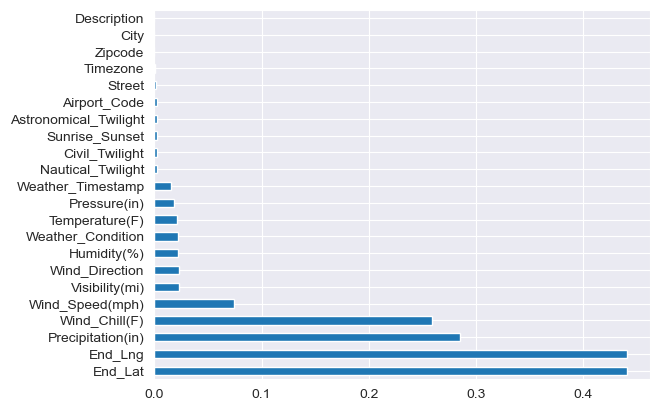

In [27]:
missing_percentage[missing_percentage != 0].plot(kind="barh")

In [28]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [29]:
data.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [30]:
unique_cities = data.City.unique()
len(unique_cities)

13679

In [31]:
cities_by_accidents = data.City.value_counts()
cities_by_accidents

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

<Axes: ylabel='City'>

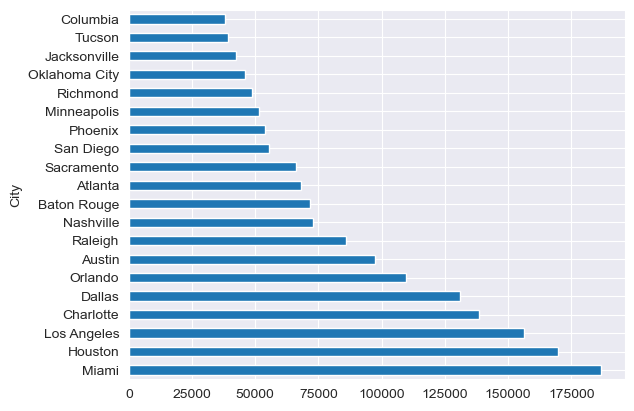

In [32]:
cities_by_accidents[:20].plot(kind="barh")

In [33]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Count'>

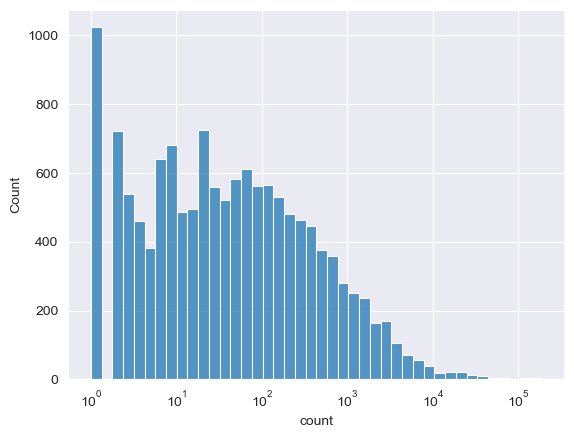

In [34]:
sns.histplot(cities_by_accidents, log_scale=True)

In [35]:
cities_by_accidents[cities_by_accidents == 1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [36]:
data.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [40]:
try:
    data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
    print("Conversion to datetime successful.")
except ValueError as e:
    print(f"Error converting Start_Time to datetime: {e}")

Conversion to datetime successful.


In [42]:
data.Start_Time.dtype

dtype('<M8[ns]')

<Axes: xlabel='Start_Time', ylabel='Count'>

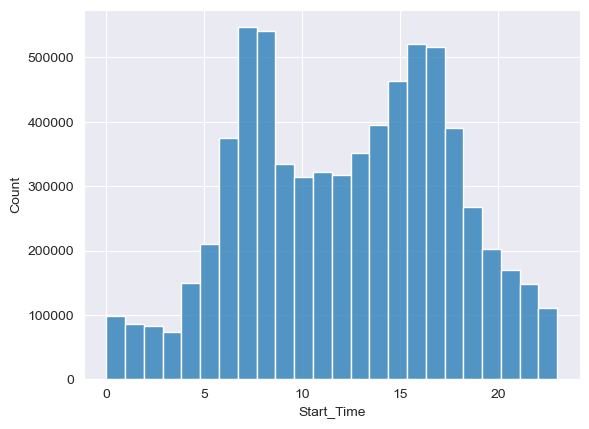

In [45]:
sns.histplot(data.Start_Time.dt.hour, bins=24, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

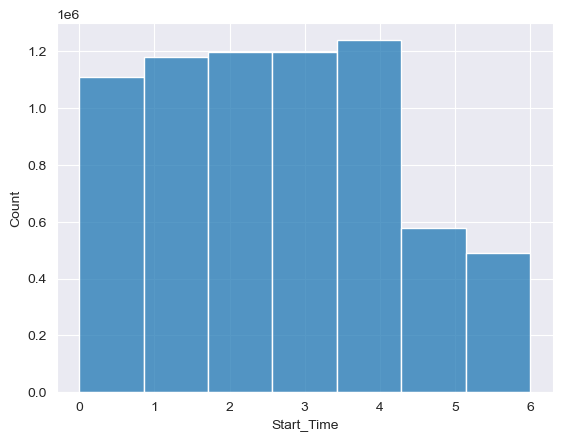

In [46]:
sns.histplot(data.Start_Time.dt.dayofweek, bins=7, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

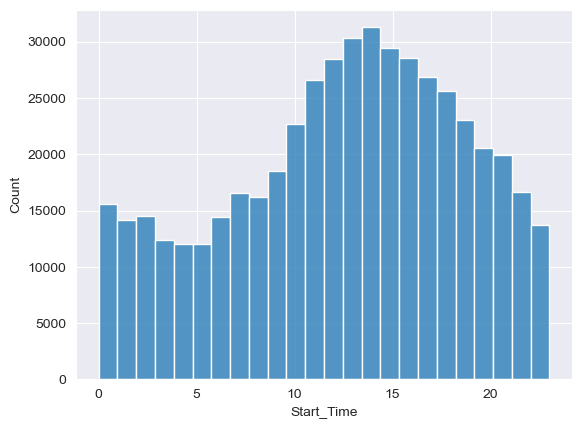

In [47]:
sundays_start_time = data.Start_Time[data.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

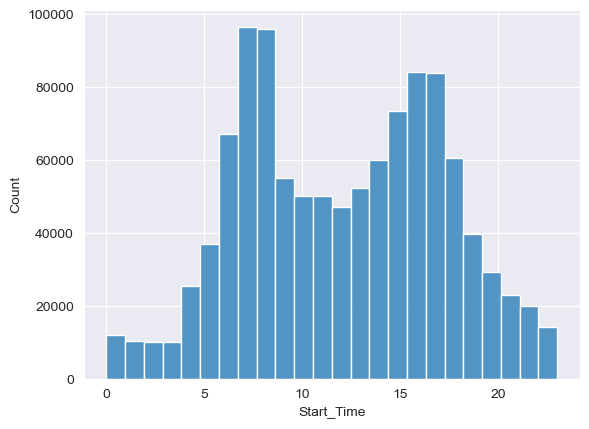

In [48]:
monday_start_time = data.Start_Time[data.Start_Time.dt.dayofweek == 0]
sns.histplot(monday_start_time.dt.hour, bins=24, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

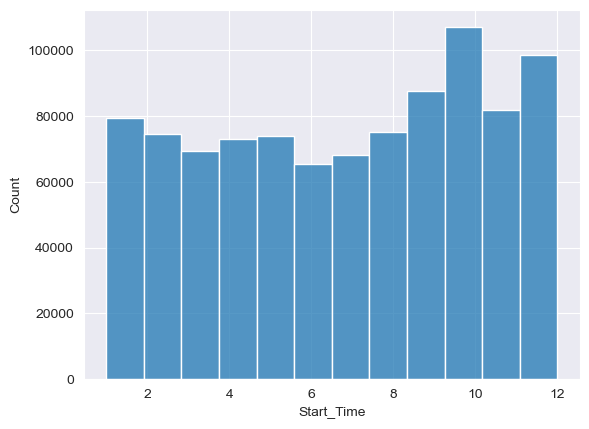

In [49]:
df_2019 = data[data.Start_Time.dt.year == 2019]
sns.histplot(df_2019.Start_Time.dt.month, bins=12, kde=False)

In [50]:
data.Start_Lng, data.Start_Lat

(0          -84.058723
 1          -82.831184
 2          -84.032608
 3          -84.205582
 4          -84.188354
               ...    
 7728389   -117.379360
 7728390   -117.148060
 7728391   -117.847790
 7728392   -118.403020
 7728393   -117.230920
 Name: Start_Lng, Length: 7728394, dtype: float64,
 0          39.865147
 1          39.928059
 2          39.063148
 3          39.747753
 4          39.627781
              ...    
 7728389    34.002480
 7728390    32.766960
 7728391    33.775450
 7728392    33.992460
 7728393    34.133930
 Name: Start_Lat, Length: 7728394, dtype: float64)

In [51]:
sample_df = data.sample(int(0.1 * len(data)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

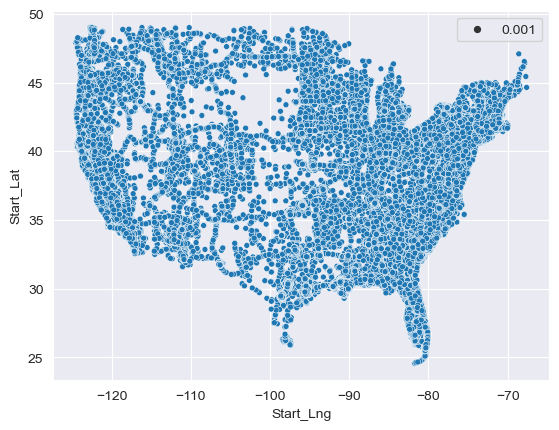

In [52]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [55]:
import folium
from folium.plugins import HeatMap

In [56]:
lat, lon = data.Start_Lat[0], data.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [58]:
for index, row in data[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
    print(row['Start_Lat'], row['Start_Lng'])


33.99405 -117.89254
44.590383 -123.06177
41.970291 -71.295868
47.55118 -122.27768
43.170596999999994 -73.71221899999998
34.145332 -117.287041
43.087551 -76.18265500000003
34.861259000000004 -82.274354
34.037967 -118.022192
34.186695 -118.474022
37.600833 -122.062194
33.977359 -81.106092
32.774281 -117.045929
41.42054 -92.960358
37.63035 -122.4347
35.590874 -118.522609
30.662897 -86.388367
40.244778 -76.104134
29.768175 -95.265442
35.797137021847725 -119.78776574077708
28.392592 -82.589196
26.606951 -80.06543
43.171703 -86.20694
39.367657 -76.466025
42.80212283114051 -123.25245022714972
41.22248 -95.99113
36.104485 -95.851059
39.076347 -84.519577
34.7514 -82.70311
39.190586 -121.031013
41.763836 -72.630127
34.1722 -118.53242
38.92644 -121.36836
40.696746999999995 -74.369202
36.978699 -121.899147
29.7257 -95.47638
38.941353 -77.544146
42.20338 -88.14471
38.628674 -121.382886
41.59592 -93.627248
29.997108 -90.143532
41.180584 -96.105644
38.190258 -85.72912600000002
29.72193360314502 -95.5

In [59]:
zip(list(data.Start_Lat), list(data.Start_Lng))

In [60]:
sample_df = data.sample(int(0.001 * len(data)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [61]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map